## In the following, we make use of an expanded version of the Telco Churn dataset, which contains 33 columns, rather than the 21 columns found in older versions. It is linked here: https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn

## Our goal is to train and fit a model to predict customer churn. We will try two models and choose the better one.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Examine the first few rows.

In [2]:
df = pd.read_csv("Telco_Churn_New_Version.csv")
df.head(30)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


### See all columns, non-null counts, and data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### Get summary statistics for numerical columns.

In [4]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### A number of columns can be dropped.

The following can be dropped:

- Count: These all = 1.
- Country: These all = US.
- State: These all = California.
- Lat Long: This duplicates the latitude and longitude columns.
- Latitude: This is too specific to be useful.
- Longitude: This is too specific to be useful.
- Churn Label: This duplicates churn value. 
- Churn Score: Unclear meaning 
- CLTV: Unclear meaning
- Churn Reason: Too many distinct natural language values

In [5]:
#Drop the columns:

df.drop(['Count','Country','State','Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Zip Code           7043 non-null   int64  
 3   Gender             7043 non-null   object 
 4   Senior Citizen     7043 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 

### Find churn percentage:

In [7]:
df["Churn Value"].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [8]:
Churn_Rate = (1869/(1869+5174))*100
print(Churn_Rate)

26.536987079369588


### Churn rate is 26.5%.

## Find and Visualize Mutual Information Scores:

### Convert data.

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,CustomerID,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,2564,562,2,1,0,0,0,2,1,0,...,0,0,0,0,0,1,3,436,157,1
1,6511,562,4,0,0,0,1,2,1,0,...,0,0,0,0,0,1,2,729,925,1
2,6551,562,5,0,0,0,1,8,1,2,...,2,0,2,2,0,1,2,1274,6104,1
3,5604,562,8,0,0,1,1,28,1,2,...,2,2,2,2,0,1,2,1371,2646,1
4,174,562,13,1,0,0,1,49,1,2,...,2,0,2,2,0,1,0,1349,4265,1


In [10]:
df = df.rename(columns={'Churn Value': 'Churn_Value'})

In [11]:
X= df.drop('Churn_Value',axis=1)
y= df.Churn_Value         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [12]:
X.dtypes

CustomerID           int32
City                 int32
Zip Code             int64
Gender               int32
Senior Citizen       int32
Partner              int32
Dependents           int32
Tenure Months        int64
Phone Service        int32
Multiple Lines       int32
Internet Service     int32
Online Security      int32
Online Backup        int32
Device Protection    int32
Tech Support         int32
Streaming TV         int32
Streaming Movies     int32
Contract             int32
Paperless Billing    int32
Payment Method       int32
Monthly Charges      int64
Total Charges        int32
dtype: object

In [13]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show features with their MI scores

Contract             0.097433
Online Security      0.064844
Tech Support         0.056962
Tenure Months        0.052377
Online Backup        0.050773
Internet Service     0.049628
Payment Method       0.045503
Device Protection    0.044288
Dependents           0.037287
Streaming Movies     0.034931
Streaming TV         0.030728
Paperless Billing    0.024137
Monthly Charges      0.018625
Gender               0.009175
Senior Citizen       0.009034
Partner              0.008313
Phone Service        0.006230
Multiple Lines       0.005589
Total Charges        0.003201
City                 0.002778
Zip Code             0.002364
CustomerID           0.001561
Name: MI Scores, dtype: float64

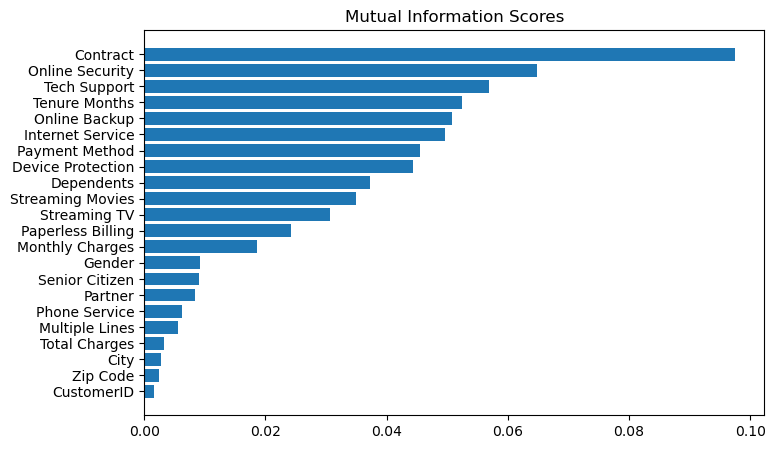

In [14]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### As expected, the presence of a contract has the largest impact on churn.

## Prepare Models

In [15]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [16]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

### Random Forest Classifier

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [18]:
X = pd.get_dummies(X)
X= scale(X)
y= df.Churn_Value       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  79.77288857345636
AUC score:  0.6978732739844791


### XGB Classifier

In [19]:
from xgboost import XGBClassifier

X = pd.get_dummies(X)
X= scale(X)
y= df.Churn_Value 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  79.27608232789211
AUC score:  0.7163241948785182
